In [ ]:
# imports
import tensorflow.keras as keras


In [ ]:
# Task 0
def autoencoder(input_dims, hidden_layers, latent_dims):
    """
    Creates a vanilla autoencoder

    Args:
        input_dims - integer containing the dimensions of the model input
        hidden_layers - list containing the number of nodes for each hidden
            layer in the encoder, respectively
        latent_dims - integer containing the dimensions of the latent space
            representation

    Returns:
        encoder - the encoder model
        decoder - the decoder model
        auto - the full autoencoder model
    """

    # First, build the encoder
    input_img = keras.Input(shape=(input_dims,))
    # print(input_img.shape)
    encoded = input_img
    for layer in hidden_layers:
        encoded = keras.layers.Dense(layer, activation='relu')(encoded)
    encoded = keras.layers.Dense(latent_dims, activation='relu')(encoded)
    encoder = keras.Model(input_img, encoded, name='encoder')

    # Now, build the decoder
    decoder_img = keras.Input(shape=(latent_dims,))
    decoded = decoder_img
    for layer in hidden_layers[::-1]:
        decoded = keras.layers.Dense(layer, activation='relu')(decoded)
    decoded = keras.layers.Dense(input_dims, activation='sigmoid')(decoded)
    decoder = keras.Model(decoder_img, decoded, name='decoder')

    # Let's put it all together
    # autoencoder_input = keras.Input(shape=(input_dims,))
    encoded_output = encoder(input_img)
    # print(input_img.shape)
    decoded_output = decoder(encoded_output)
    autoencoder = keras.Model(input_img,
                              decoded_output,
                              name='autoencoder')

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, autoencoder


In [ ]:
# 0-main
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import mnist

# autoencoder = __import__('0-vanilla').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32)
auto.fit(x_train, x_train, epochs=50,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()

In [ ]:
# Task 1 - Sparse autoencoder
# Add a lambtha, to be used as the L1 paramater for regularization

def autoencoder(input_dims, hidden_layers, latent_dims, lambtha):
    """
    Creates a sparse autoencoder

        Args:
        input_dims - integer containing the dimensions of the model input
        hidden_layers - list containing the number of nodes for each hidden
            layer in the encoder, respectively
        latent_dims - integer containing the dimensions of the latent space
            representation
        lambtha - regularization paramater used for L1 regularization on the
            encoded output

    Returns:
        encoder - the encoder model
        decoder - the decoder model
        auto - the full autoencoder model
    """

    # Create reg variable to keep line length short
    reg = keras.regularizers.l1(lambtha)

    # First, build the encoder
    input_img = keras.Input(shape=(input_dims,))
    encoded = input_img
    for layer in hidden_layers:
        encoded = keras.layers.Dense(layer,
                                     activation='relu'
                                     )(encoded)
    encoded = keras.layers.Dense(latent_dims,
                                 activation='relu',
                                 activity_regularizer=reg
                                 )(encoded)
    encoder = keras.Model(input_img, encoded, name='encoder')

    # Now, build the decoder
    decoder_img = keras.Input(shape=(latent_dims,))
    decoded = decoder_img
    for layer in hidden_layers[::-1]:
        decoded = keras.layers.Dense(layer, activation='relu')(decoded)
    decoded = keras.layers.Dense(input_dims, activation='sigmoid')(decoded)
    decoder = keras.Model(decoder_img, decoded, name='decoder')

    # Let's put it all together
    encoded_output = encoder(input_img)
    decoded_output = decoder(encoded_output)
    autoencoder = keras.Model(input_img,
                              decoded_output,
                              name='autoencoder')

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, autoencoder

In [ ]:
# 1-main

import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import mnist

# autoencoder = __import__('1-sparse').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder(784, [128, 64], 32, 10e-6)
auto.fit(x_train, x_train, epochs=100,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()

In [ ]:
# Convolutional Autoencoder
def autoencoder(input_dims, filters, latent_dims):
    """
    Create a convolutional autoencoder

    Each convolution in the encoder and decoder should use a kernel size of
        (3, 3) with same padding and relu activation followed by max pooling
        size of (2, 2)

    Args:
        input_dims - tuple of integers containing the dimensions of the input
        filters - list containing the number of filters for each convolutional
            layer in the encoder, respectively
        The filters should be reversed for the decoder
        latent_dims - tuple of integers containing the dimensions of the latent
            space representation

    Returns:
        encoder - the encoder model
        decoder - the decoder model
        auto - the full autoencoder model
    """
    # i = 0
    # Build the encoder
    input_img = keras.Input(shape=input_dims)
    encoded = input_img
    for filter in filters:
        encoded = keras.layers.Conv2D(filter,
                                      (3, 3),
                                      activation='relu',
                                      padding='same')(encoded)
        encoded = keras.layers.MaxPooling2D((2, 2),
                                            padding='same')(encoded)
    encoder = keras.Model(input_img, encoded, name='encoder')

    # Build the decoder
    decoder_img = keras.Input(shape=latent_dims)
    decoded = decoder_img
    # print(filters[0])
    # print(filters[1])
    # print(filters[2])
    # Loop through filters backwards
    # for filter in filters[1::-1]:
    #     print("loop: " + str(i))
    #     print(filter)
    #     i += 1
    #     decoded = keras.layers.Conv2D(filter - 1,
    #                                   (3, 3),
    #                                   activation='relu',
    #                                   padding='same')(decoded)
    #     decoded = keras.layers.UpSampling2D((2, 2))(decoded)
    # print(filters[0])
    # Going to try to manually loop
    decoded = keras.layers.Conv2D(filters[2],
                                  (3, 3),
                                  activation='relu',
                                  padding='same')(decoded)
    decoded = keras.layers.UpSampling2D((2, 2))(decoded)
    
    decoded = keras.layers.Conv2D(filters[1],
                                  (3, 3),
                                  activation='relu',
                                  padding='same')(decoded)
    decoded = keras.layers.UpSampling2D((2, 2))(decoded)

    decoded = keras.layers.Conv2D(filters[0],
                                  (3, 3),
                                  activation='relu',
                                  padding='valid')(decoded)
    decoded = keras.layers.UpSampling2D((2, 2))(decoded)
    # print("Exited loop")
    decoded = keras.layers.Conv2D(1,
                                  (3, 3),
                                  activation='sigmoid',
                                  padding='same')(decoded)
    decoder = keras.Model(decoder_img,
                          decoded,
                          name='decoder')

    # Bring it all together
    encoded_output = encoder(input_img)
    decoded_output = decoder(encoded_output)
    autoencoder = keras.Model(input_img,
                              decoded_output,
                              name='autoencoder')

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, autoencoder

In [ ]:
# 2-main
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import mnist

# autoencoder = __import__('2-convolutional').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)
print(x_test.shape)
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder((28, 28, 1), [16, 8, 8], (4, 4, 8))
auto.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)[:,:,:,0]

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i,:,:,0])
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i])
plt.show()

In [12]:
# Task 3 - Variational Autoencoder

def sampling(args):
    """
    Method to sample new, similar points from the latent space
    """
    z_mean, z_log_sigma, latent_dims= args
    epsilon = keras.backend.random_normal(shape=(keras.backend.shape(z_mean)[0], latent_dims), mean=0., stddev=0.1)

    return z_mean + keras.backend.exp(z_log_sigma) * epsilon

def autoencoder(input_dims, hidden_layers, latent_dims):
    """
    Create a variational autoencoder

    Args:
        input_dims - integer containing the dimension of the input
        hidden_layers - list containing the number of nodes for each hidden
            layer in the encoder, respectively
        The filters should be reversed for the decoder
        latent_dims - integer containing the dimension of the latent
            space representation

    Returns:
        encoder - the encoder model
        decoder - the decoder model
        auto - the full autoencoder model
    """
    # First, build the encoder
    input_img = keras.Input(shape=(input_dims,))
    h = input_img

    for layer in hidden_layers:
        h = keras.layers.Dense(layer, activation='relu')(h)
    z_mean = keras.layers.Dense(latent_dims)(h)
    z_log_sigma = keras.layers.Dense(latent_dims)(h)

    z = keras.layers.Lambda(sampling)([z_mean, z_log_sigma, latent_dims])

    encoder = keras.Model(input_img, [z_mean, z_log_sigma, z], name='encoder')

    # Now the decoder
    latent_inputs = keras.Input(shape=(latent_dims,))
    x = latent_inputs
    for layer in hidden_layers[::-1]:
        x = keras.layers.Dense(layer, activation='relu')(x)
    outputs = keras.layers.Dense(input_dims, activation='sigmoid')(x)
    decoder = keras.Model(latent_inputs, outputs, name='decoder')

    # instantiate the VAE model
    outputs = decoder(encoder(input_img)[2])
    vae = keras.Model(input_img, outputs, name='vae_mlp')

    reconstruction_loss = keras.losses.binary_crossentropy(input_img,
                                                           outputs)
    reconstruction_loss *= input_dims
    kl_loss = 1 + z_log_sigma - keras.backend.square(z_mean)
    kl_loss -= keras.backend.exp(z_log_sigma)
    kl_loss = keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = keras.backend.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')

    return encoder, decoder, vae

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 207.9314 - val_loss: 175.3456
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 169.8185 - val_loss: 166.1786
Epoch 3/50
235/235 [==============================] - 5s 22ms/step - loss: 164.1223 - val_loss: 162.7152
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 161.2832 - val_loss: 160.4814
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 159.2308 - val_loss: 158.5676
Epoch 6/50
235/235 [==============================] - 5s 21ms/step - loss: 157.5917 - val_loss: 157.0615
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 156.0969 - val_loss: 155.6548
Epoch 8/50
235/235 [==============================] - 5s 21ms/step - loss: 154.8907 - val_loss: 154.6911
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 153.8330 - val_loss: 153.9446
Epoch 10/50
235/235 [==============================] - 

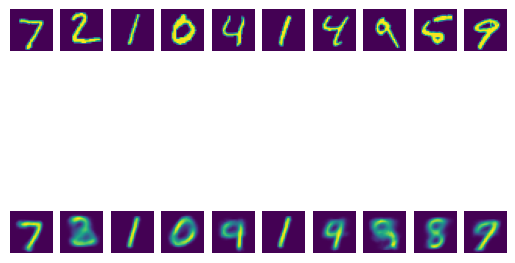

5/5 [==============================] - 0s 8ms/step


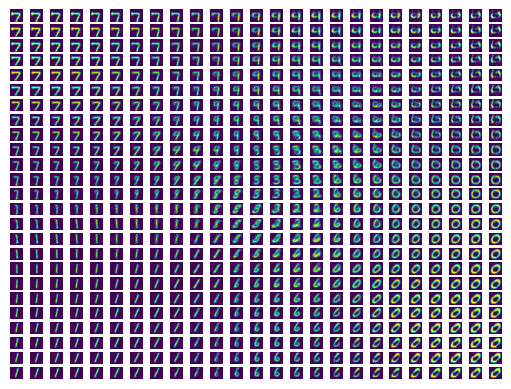

: 

In [13]:
# 3-main
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import mnist

# autoencoder = __import__('3-variational').autoencoder

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
np.random.seed(0)
tf.set_random_seed(0)
encoder, decoder, auto = autoencoder(784, [512], 2)
auto.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded, mu, log_sig = encoder.predict(x_test[:10])
print(mu)
print(np.exp(log_sig / 2))
reconstructed = decoder.predict(encoded).reshape((-1, 28, 28))
x_test = x_test.reshape((-1, 28, 28))

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i])
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i])
plt.show()


l1 = np.linspace(-3, 3, 25)
l2 = np.linspace(-3, 3, 25)
L = np.stack(np.meshgrid(l1, l2, sparse=False, indexing='ij'), axis=2)
G = decoder.predict(L.reshape((-1, 2)), batch_size=125)

for i in range(25*25):
    ax = plt.subplot(25, 25, i + 1)
    ax.axis('off')
    plt.imshow(G[i].reshape((28, 28)))
plt.show()